<a href="https://colab.research.google.com/github/khoa2210/Hoc-Python/blob/main/KNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thư viện 

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

Tải tập dữ liệu Iris 

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Tên cột
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Đọc dataset đưa về dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Chia tập dữ liệu thành tập phát triển và tập kiểm tra.

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Tách thử nghiệm

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Tính năng mở rộng quy mô

---



In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Đào tạo và Dự đoán

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test)

Đánh giá thuật toán

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



So sánh tỷ lệ lỗi với giá trị K

In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

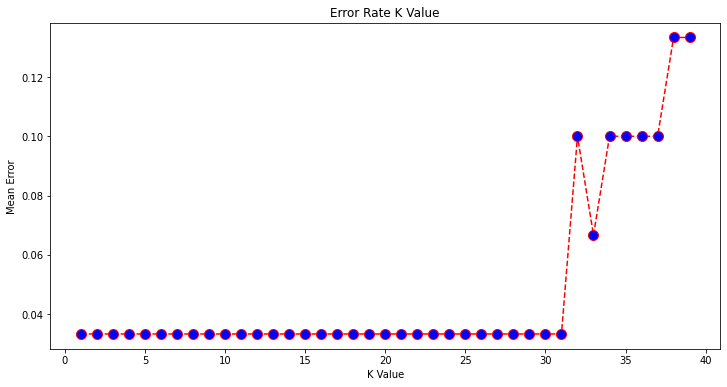

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')